<a href="https://colab.research.google.com/github/seojinhyeong99/syu/blob/main/%EC%8B%A0%EC%B2%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_linnerud#신체 정보?
from sklearn.model_selection import train_test_split  #데이터셋 분할
import pandas as pd # 데이터프레임 위한 데이터 패키지
import numpy as np # 데이터 셋을 다루기 위한 패키지

In [ ]:
dt=load_linnerud()#sklearn에서 제공하는 신체정보 데이터 다운로드
print(dt.DESCR)#디스크립션

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [ ]:
print(dt.keys())

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
dt.data

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [ ]:
dt.target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

In [ ]:
dt.target[1][0]

189.0

In [ ]:
for i in dt.target:
  i[0]=i[0]*0.4536

In [ ]:
dt.target

array([[ 86.6376,  36.    ,  50.    ],
       [ 85.7304,  37.    ,  52.    ],
       [ 87.5448,  38.    ,  58.    ],
       [ 73.4832,  35.    ,  62.    ],
       [ 85.7304,  35.    ,  46.    ],
       [ 82.5552,  36.    ,  56.    ],
       [ 95.7096,  38.    ,  56.    ],
       [ 75.7512,  34.    ,  60.    ],
       [ 79.8336,  31.    ,  74.    ],
       [ 69.8544,  33.    ,  56.    ],
       [ 76.6584,  34.    ,  50.    ],
       [ 75.2976,  33.    ,  52.    ],
       [ 69.8544,  34.    ,  64.    ],
       [112.0392,  46.    ,  50.    ],
       [ 87.5448,  36.    ,  46.    ],
       [ 91.6272,  37.    ,  62.    ],
       [ 79.8336,  37.    ,  54.    ],
       [ 71.2152,  32.    ,  52.    ],
       [ 70.7616,  33.    ,  54.    ],
       [ 62.5968,  33.    ,  68.    ]])

In [ ]:
print(dt.feature_names)#턱,윗몸일으키기,점프

['Chins', 'Situps', 'Jumps']


In [ ]:
dt.target_names#무게,허리,맥박

['Weight', 'Waist', 'Pulse']

In [ ]:
print(dt.data.shape)
print(dt.target.shape)

(20, 3)
(20, 3)


In [ ]:



df=pd.DataFrame(dt.data,columns=dt.feature_names)
df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [ ]:
ext=dt.target.T#컬럼 빼는 법을 몰라서 뒤집기
ext

array([[ 86.6376,  85.7304,  87.5448,  73.4832,  85.7304,  82.5552,
         95.7096,  75.7512,  79.8336,  69.8544,  76.6584,  75.2976,
         69.8544, 112.0392,  87.5448,  91.6272,  79.8336,  71.2152,
         70.7616,  62.5968],
       [ 36.    ,  37.    ,  38.    ,  35.    ,  35.    ,  36.    ,
         38.    ,  34.    ,  31.    ,  33.    ,  34.    ,  33.    ,
         34.    ,  46.    ,  36.    ,  37.    ,  37.    ,  32.    ,
         33.    ,  33.    ],
       [ 50.    ,  52.    ,  58.    ,  62.    ,  46.    ,  56.    ,
         56.    ,  60.    ,  74.    ,  56.    ,  50.    ,  52.    ,
         64.    ,  50.    ,  46.    ,  62.    ,  54.    ,  52.    ,
         54.    ,  68.    ]])

In [ ]:
df['target']=ext[2]
df

,Chins,Situps,Jumps,target
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0
5,4.0,101.0,42.0,56.0
6,8.0,101.0,38.0,56.0
7,6.0,125.0,40.0,60.0
8,15.0,200.0,40.0,74.0
9,17.0,251.0,250.0,56.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

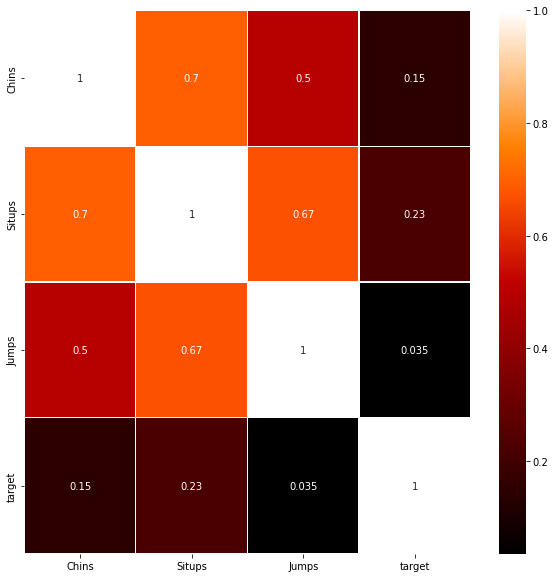

In [ ]:
colormap = plt.cm.gist_heat   #그래프의 색상 구성
plt.figure(figsize=(10,10))   #그래프의 크기

# 그래프의 속성을 결정. vmax의 값을 1로 지정해 1에 가까울 수록 밝은 색으로 표시되게 함
sns.heatmap(df.corr(),linewidths=0.1,vmax=1, cmap=colormap, linecolor='white', annot=True)
plt.show()

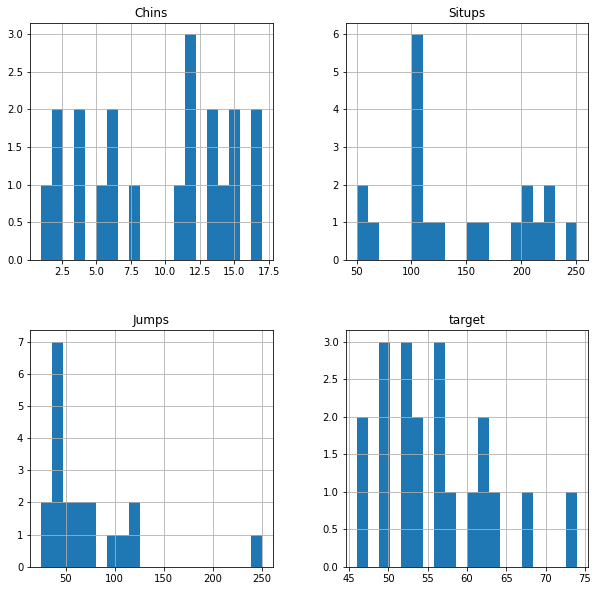

In [ ]:
df.hist(bins=20, figsize=(10,10))  #bins: 데이터 구간 /  figsize: 그래프 사이즈(단위는 인치)
plt.show()

In [ ]:
df

,Chins,Situps,Jumps,target
0,5.0,162.0,60.0,50.0
1,2.0,110.0,60.0,52.0
2,12.0,101.0,101.0,58.0
3,12.0,105.0,37.0,62.0
4,13.0,155.0,58.0,46.0
5,4.0,101.0,42.0,56.0
6,8.0,101.0,38.0,56.0
7,6.0,125.0,40.0,60.0
8,15.0,200.0,40.0,74.0
9,17.0,251.0,250.0,56.0


In [ ]:
#x = df[['Chins','Situps','Jumps']]
#x=df[['Chins','Jumps']]#턱걸이와 점프로 무게를 잘 예측할거라고 생각했지만 그렇지 않았음
#x=df[['Situps','Jumps']]#허리를 예측하기에는 윗몸일으키기와 점프의 개수만으로 학습하는게 가장 효율이 좋음
#x=df[['Situps','Chins']]#이 조합도 허리둘레를 잘 예측함
#x=df[['Jumps']]
x=df[['Chins','Jumps']]
y=df[['target']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(mlr.score(x_train,y_train))

0.06238287944823706


In [ ]:
print(mlr.score(x_test,y_test))

-1.4496753060643148


의외로 운동지표로 무게를 예측하기는 힘들었음
허리는 (윗몸일으키기,점프) 또는 (윗몸일으키기,턱걸이) 조합으로 예측하면 결정계수가 괜찮게 나옴
맥박은 상관계수도 낮고 어떤 조합으로 해도 결정계수가 좋게 나오지 않음